## Feature importance

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


125AftAir


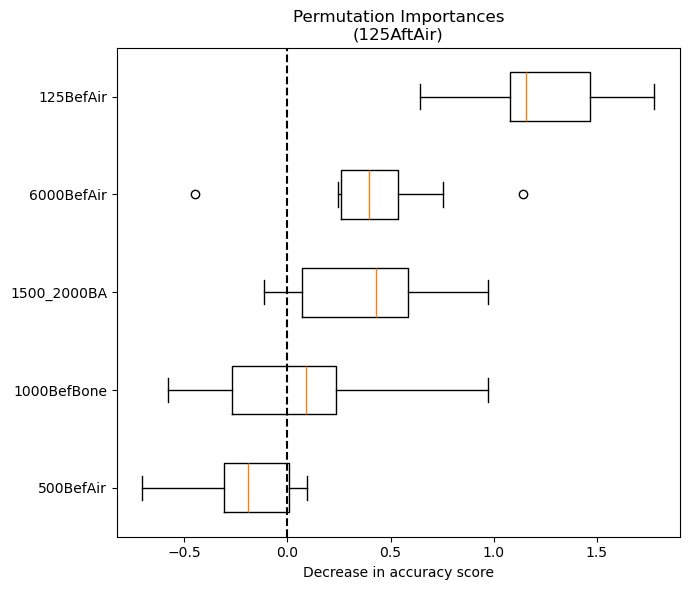

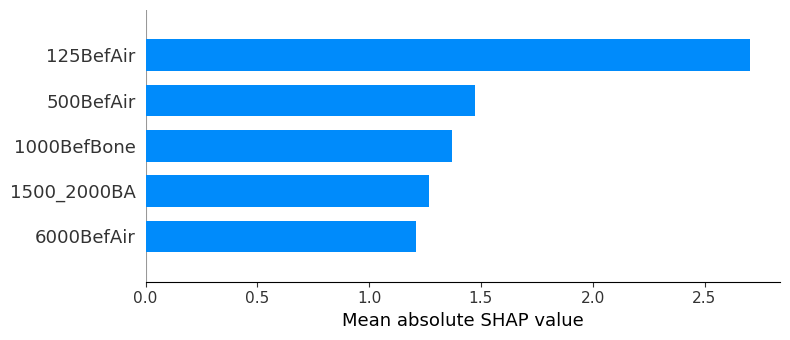

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


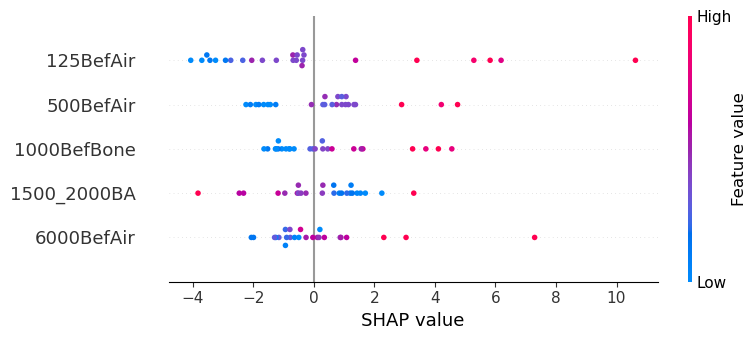

250AftAir


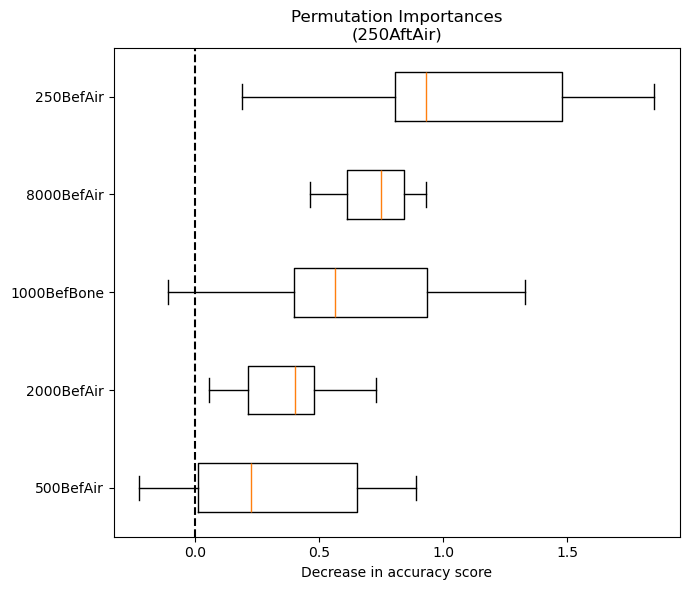

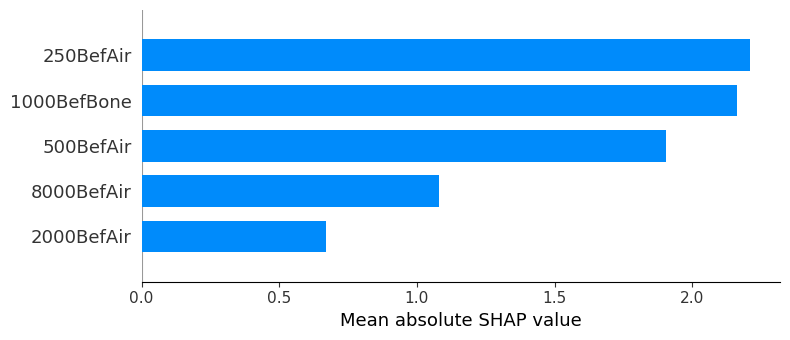

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


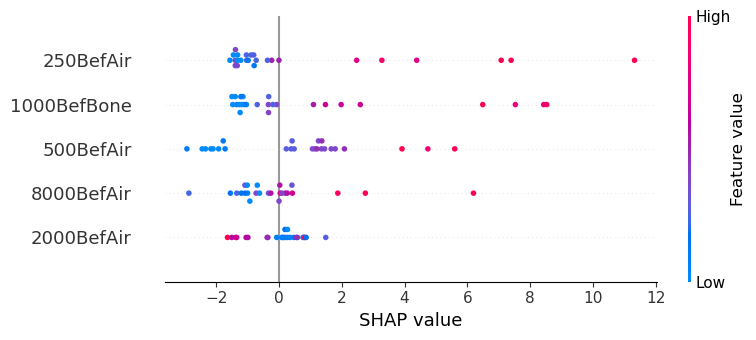

500AftAir


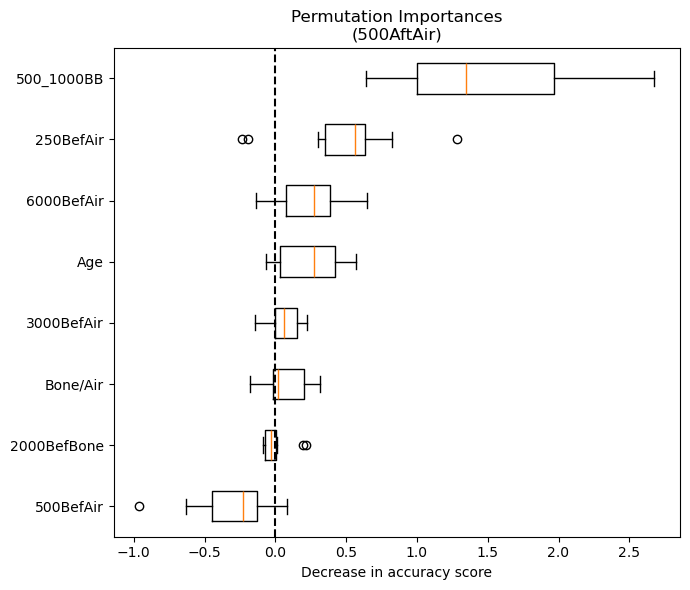

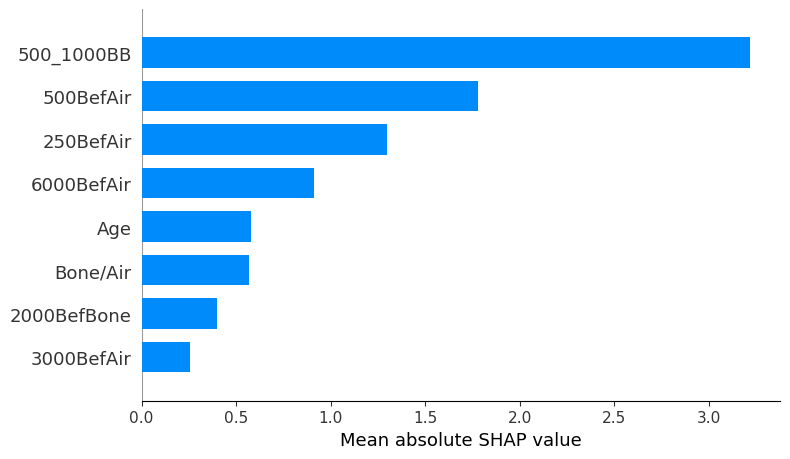

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


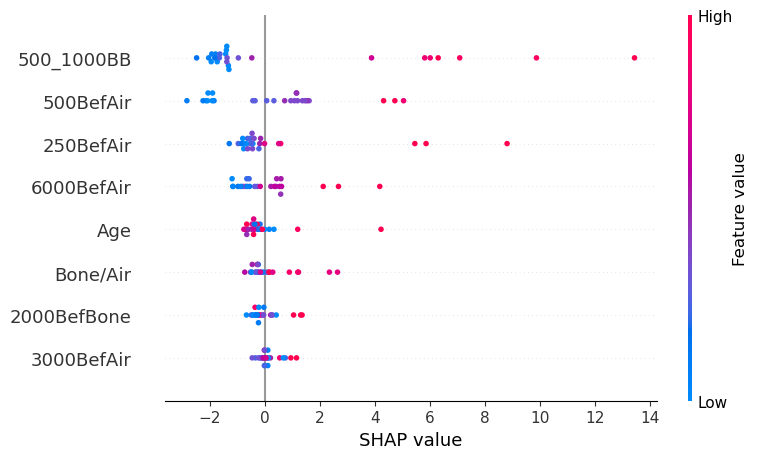

1000AftAir


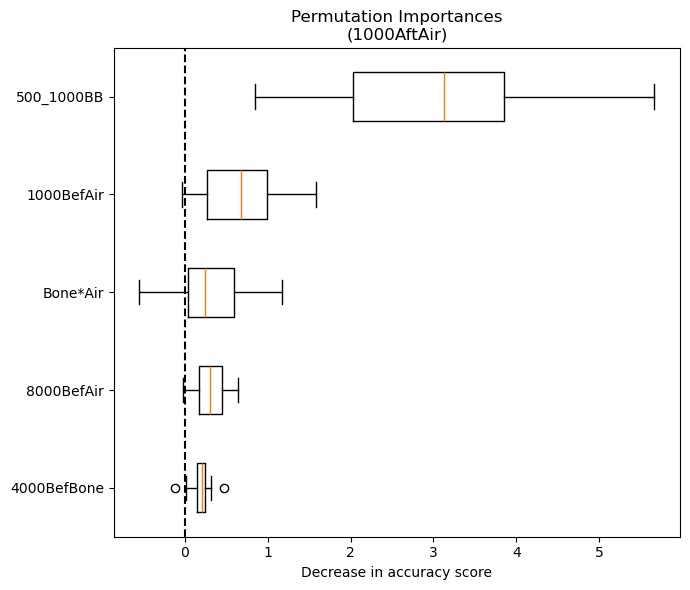

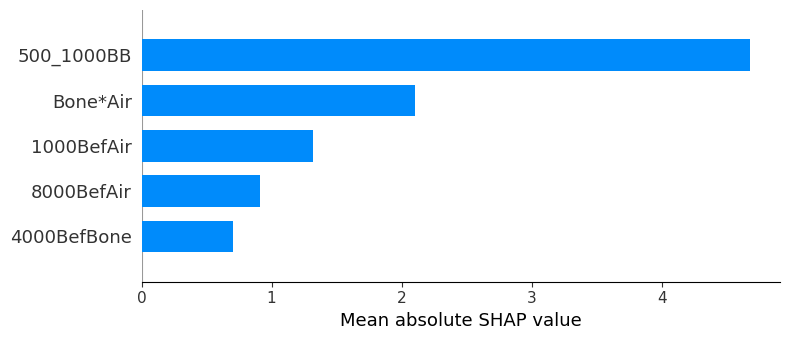

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


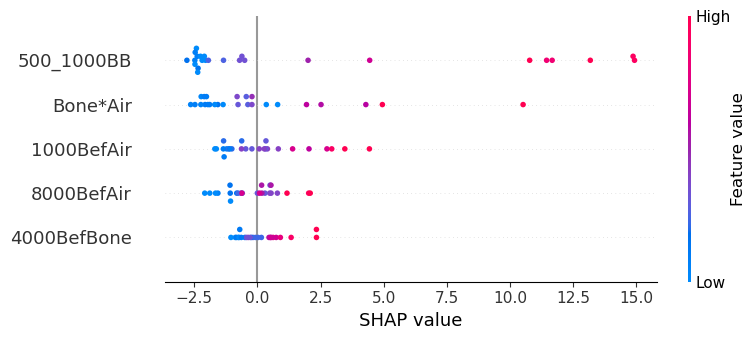

1500AftAir


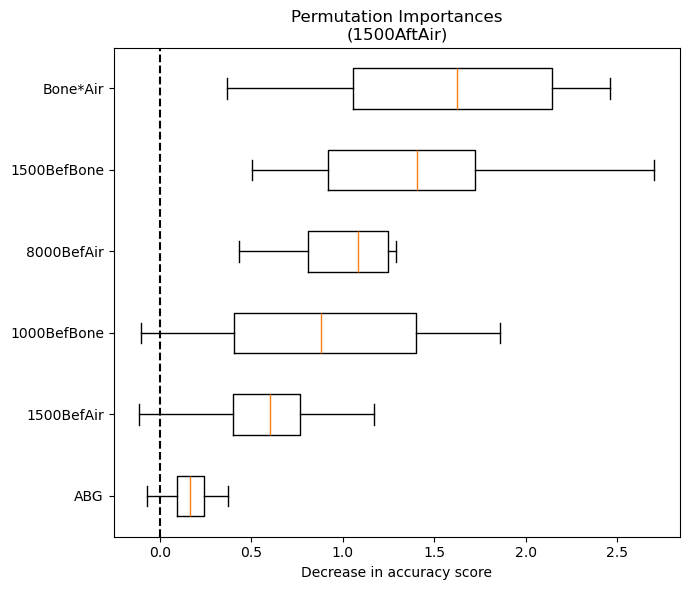

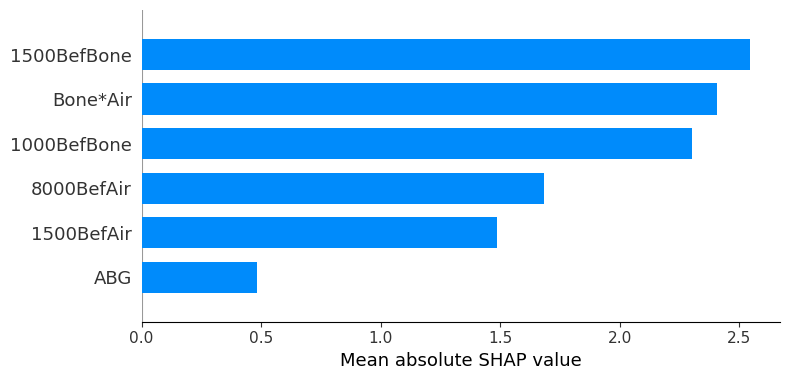

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


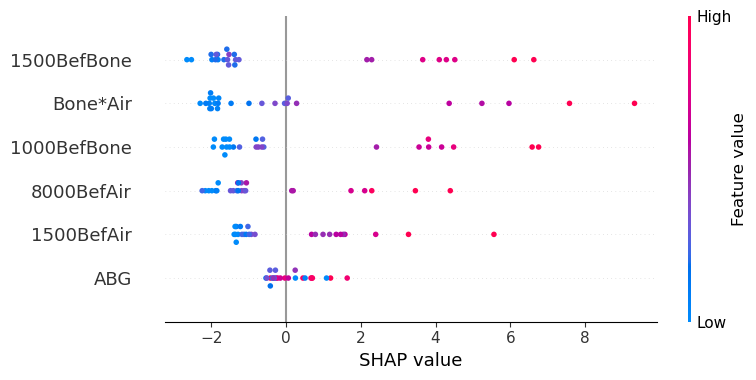

2000AftAir


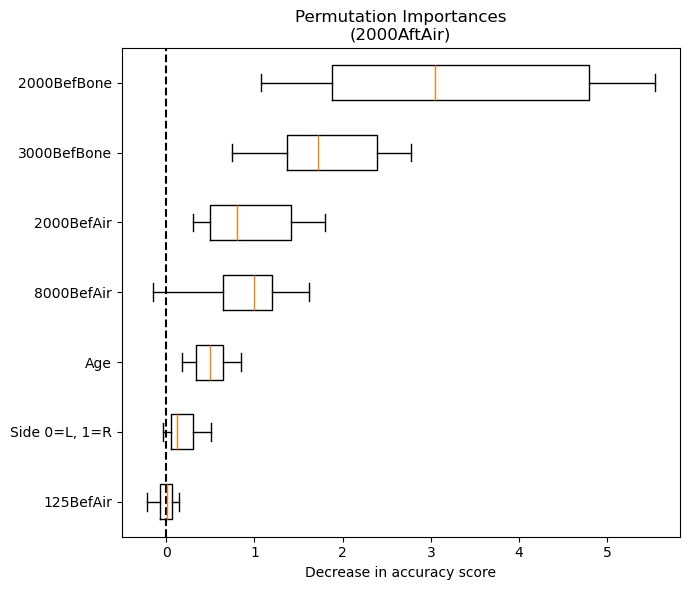

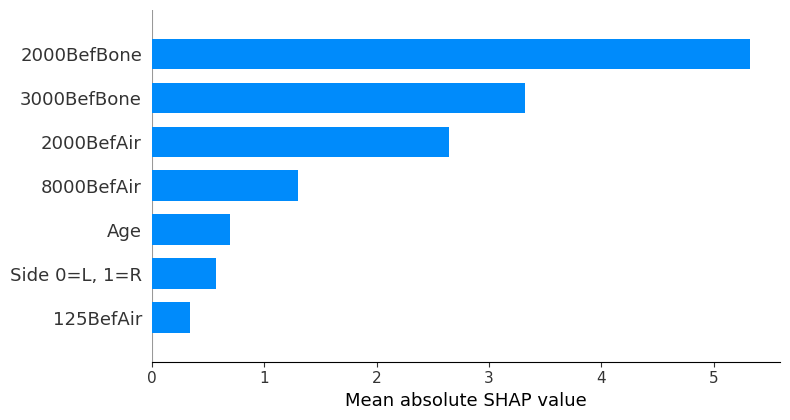

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


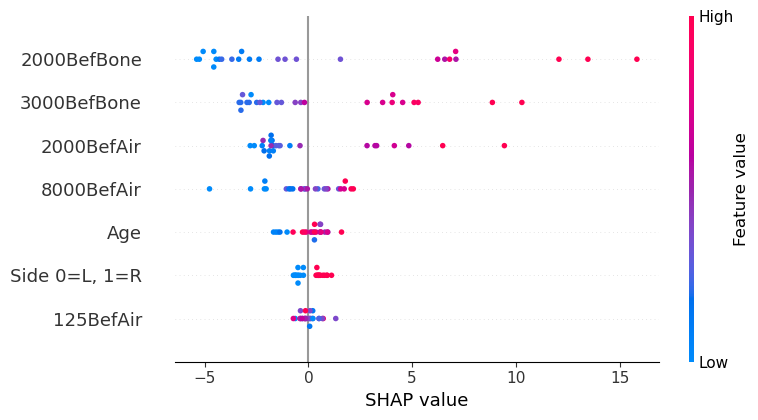

3000AftAir


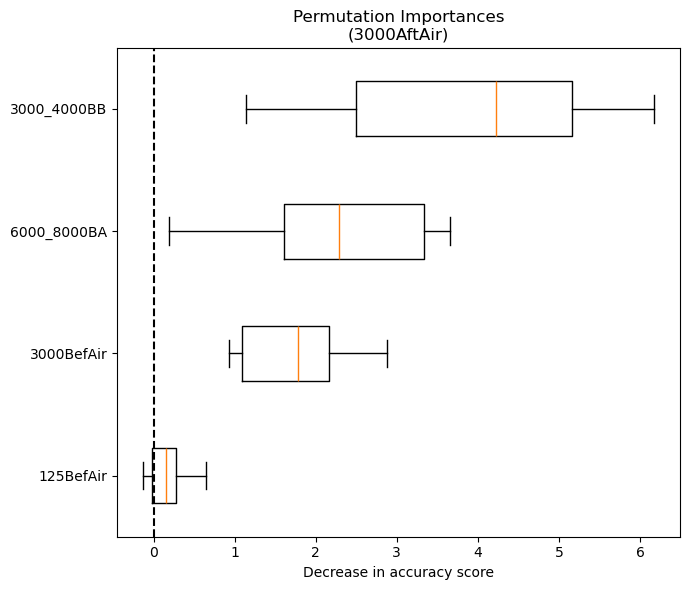

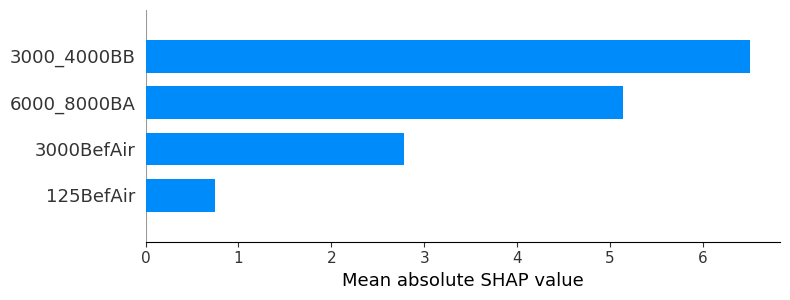

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


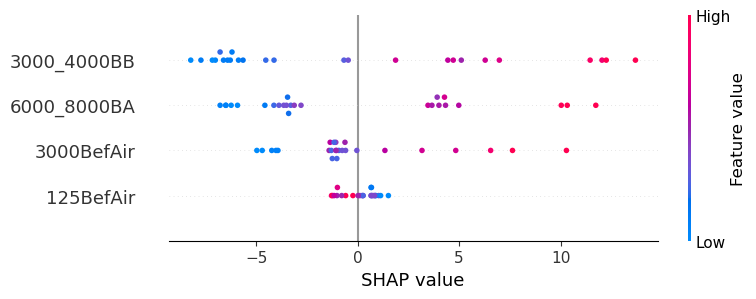

4000AftAir


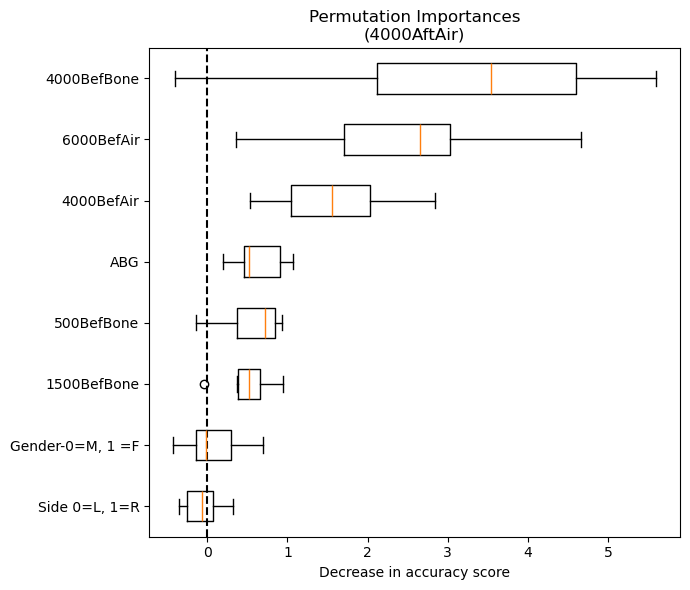

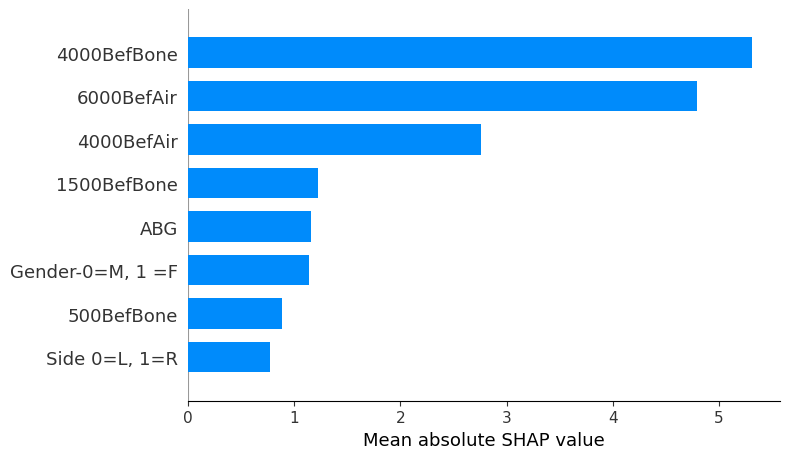

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


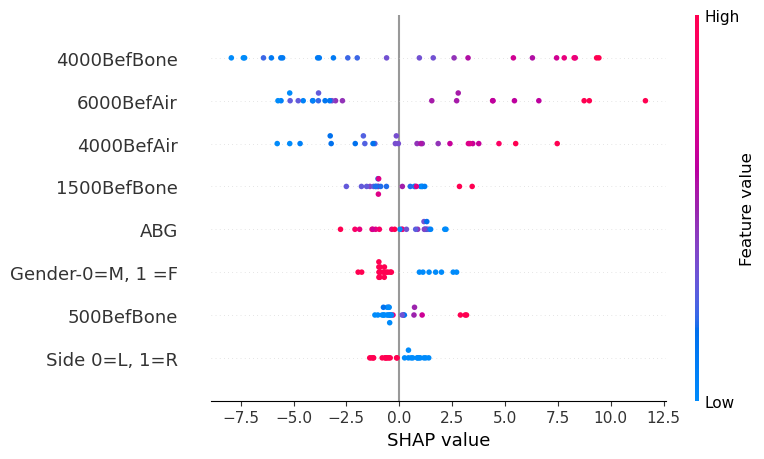

6000AftAir


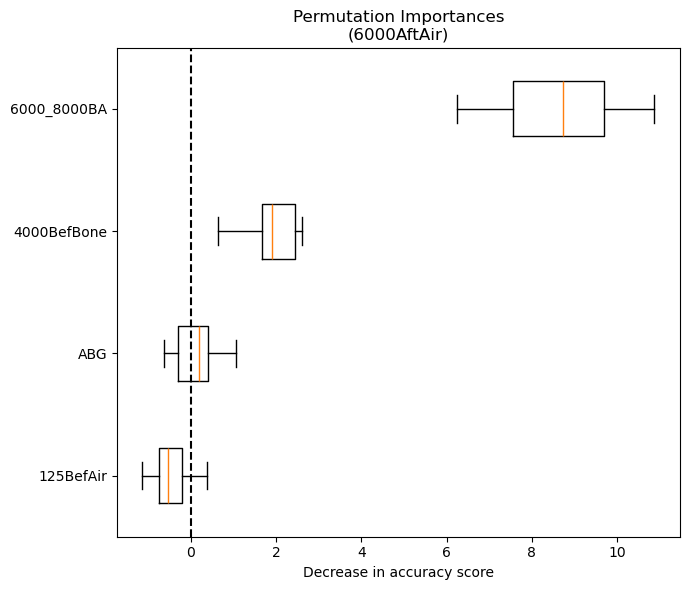

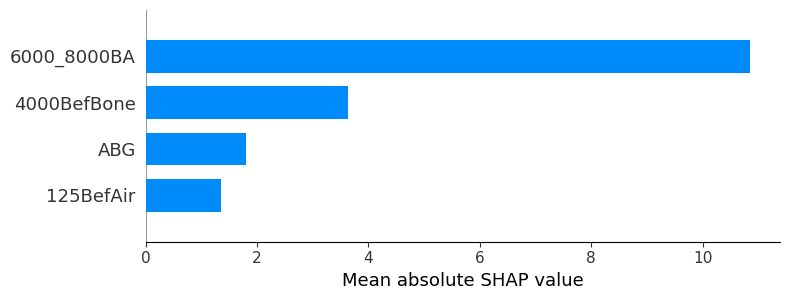

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


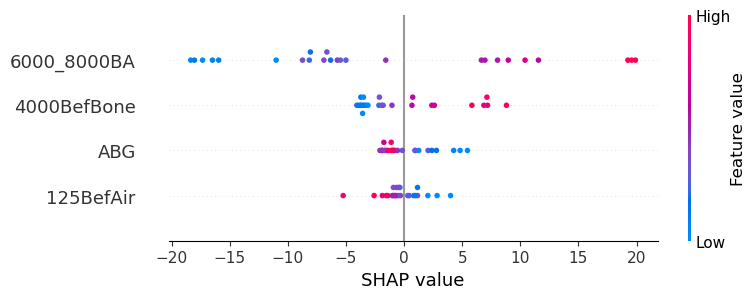

8000AftAir


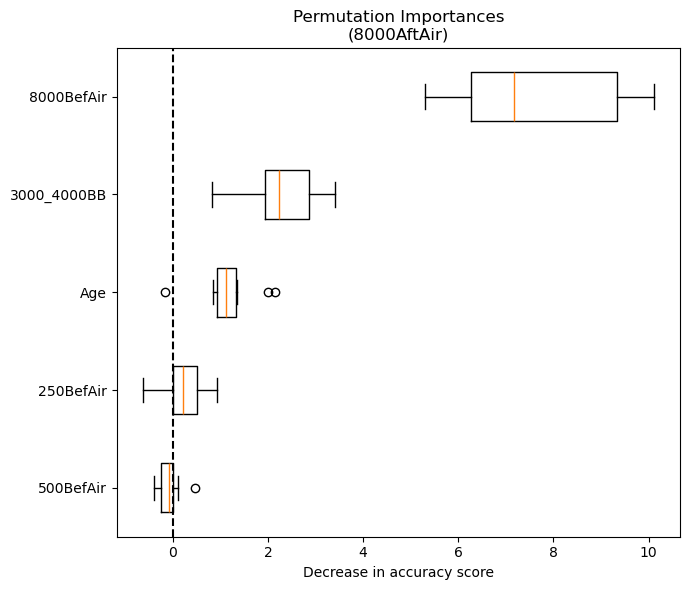

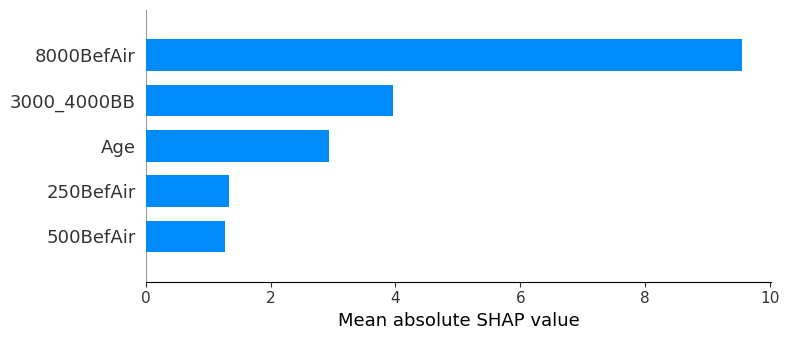

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


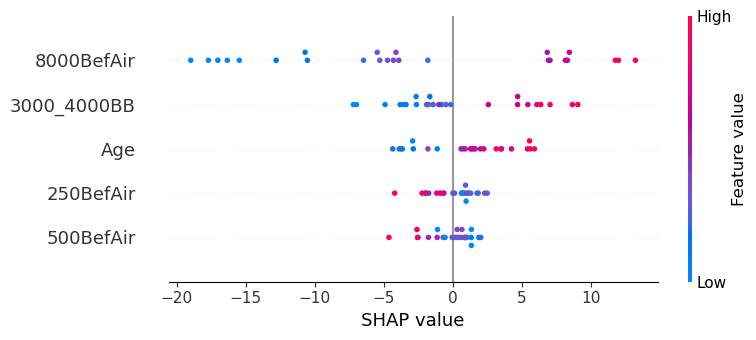

500AftBone


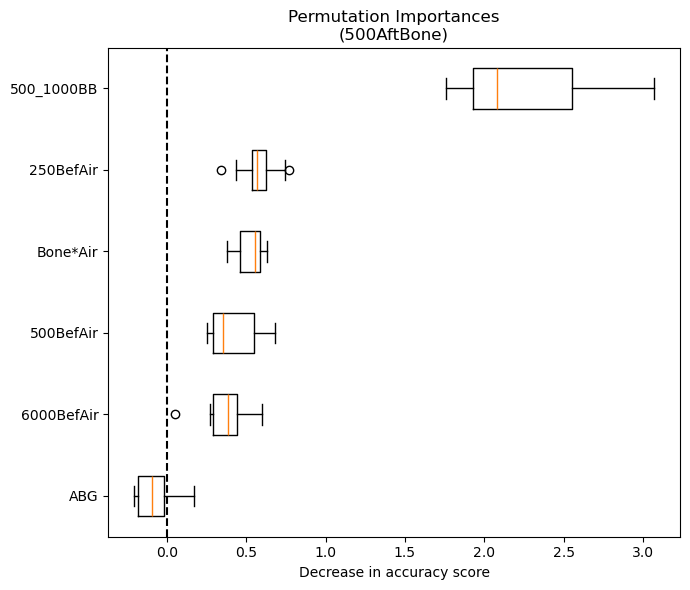

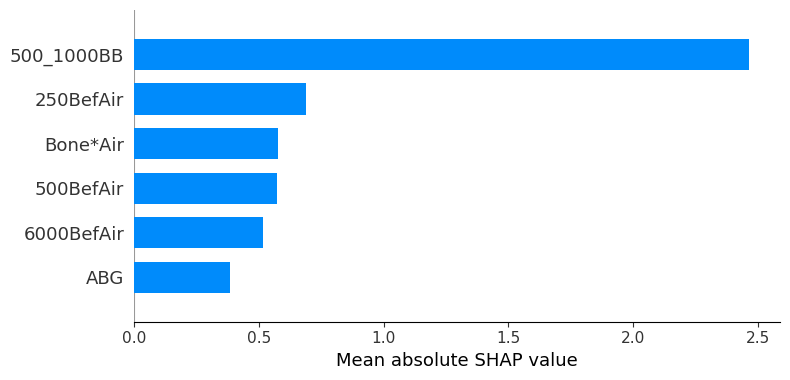

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


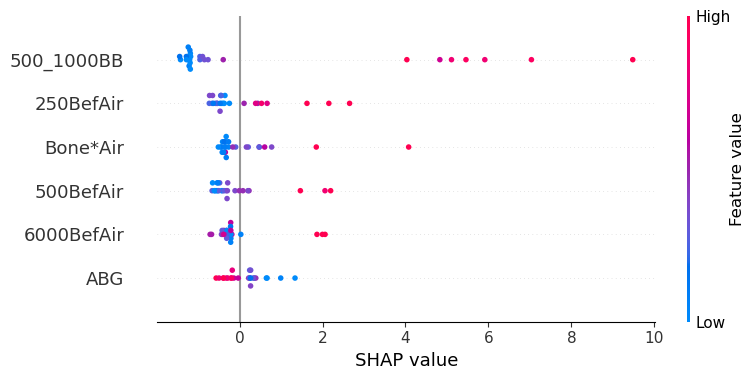

1000AftBone


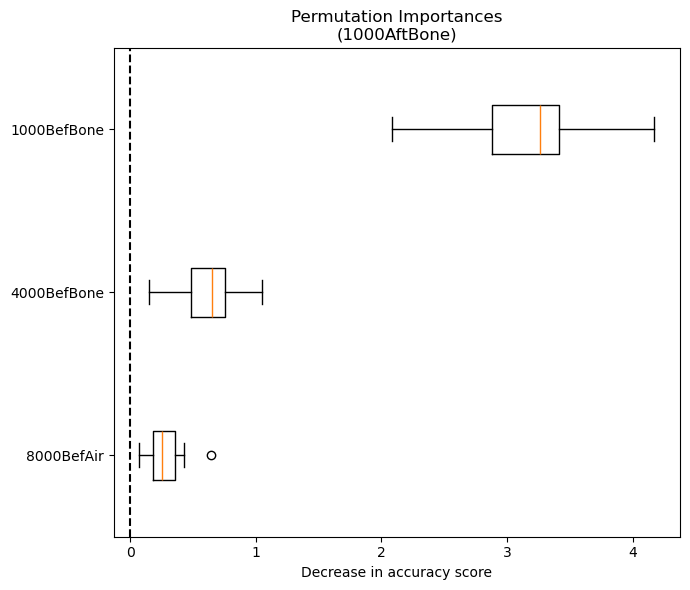

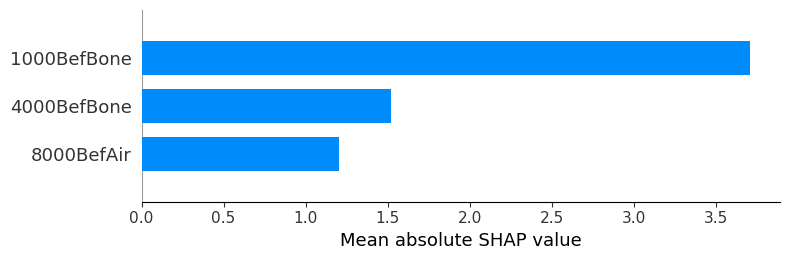

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


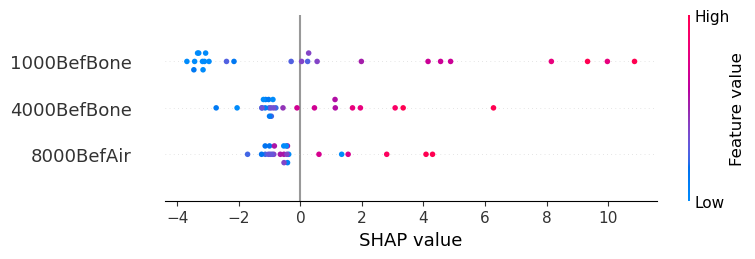

1500AftBone


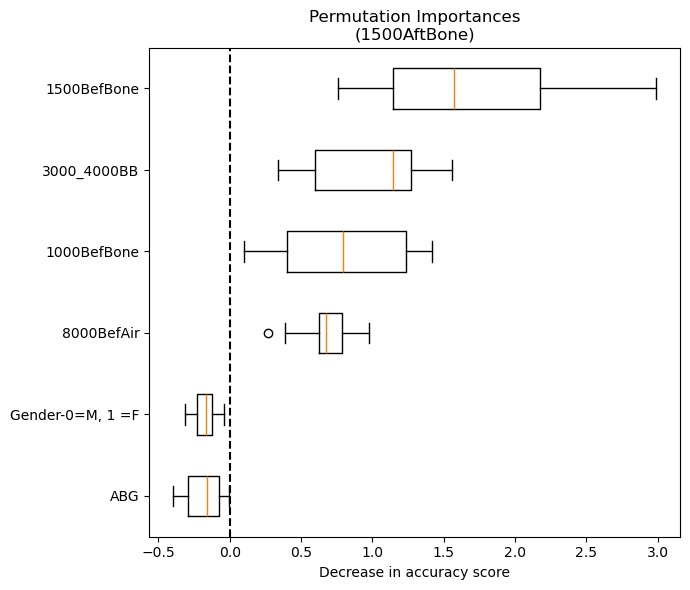

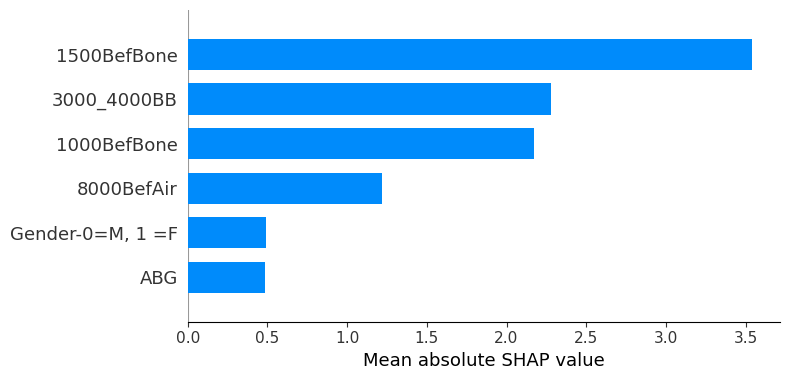

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


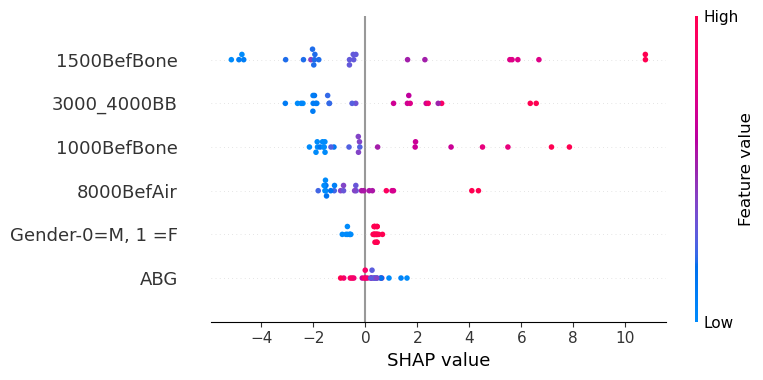

2000AftBone


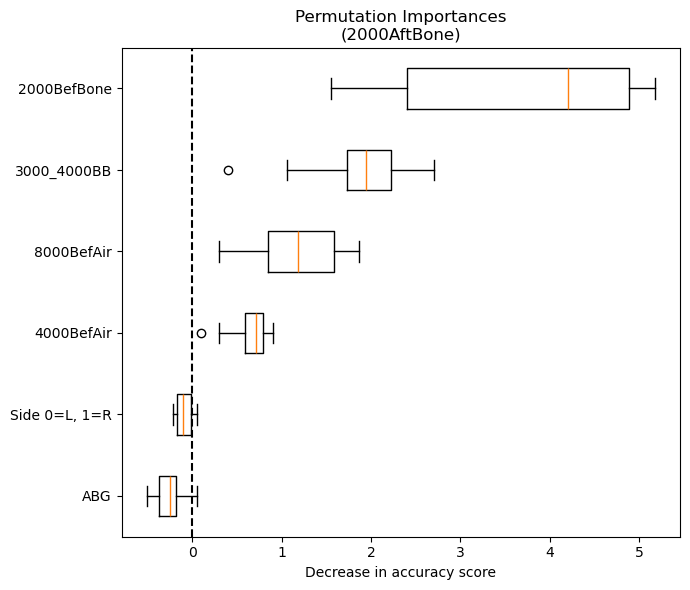

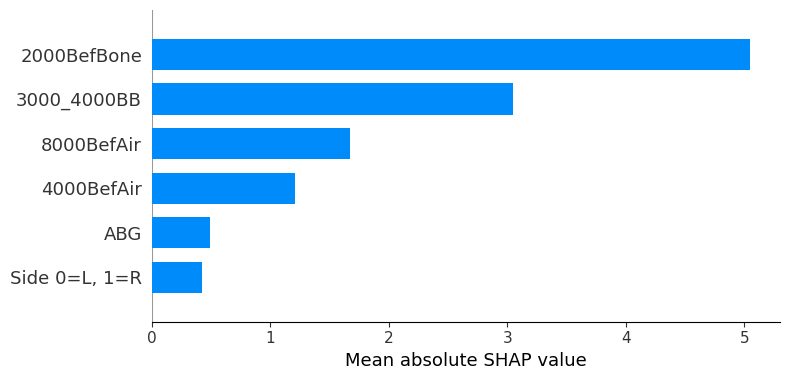

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


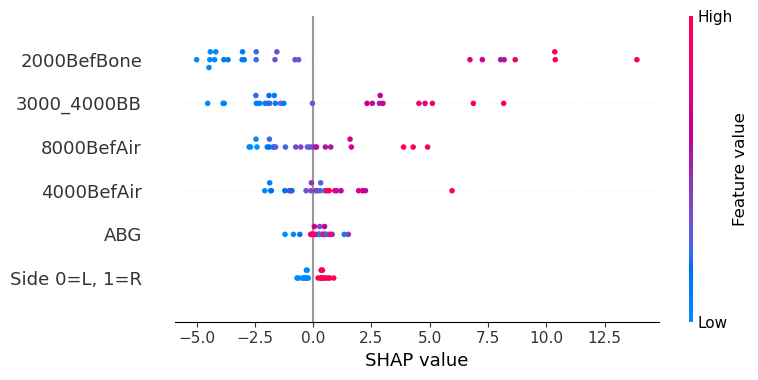

3000AftBone


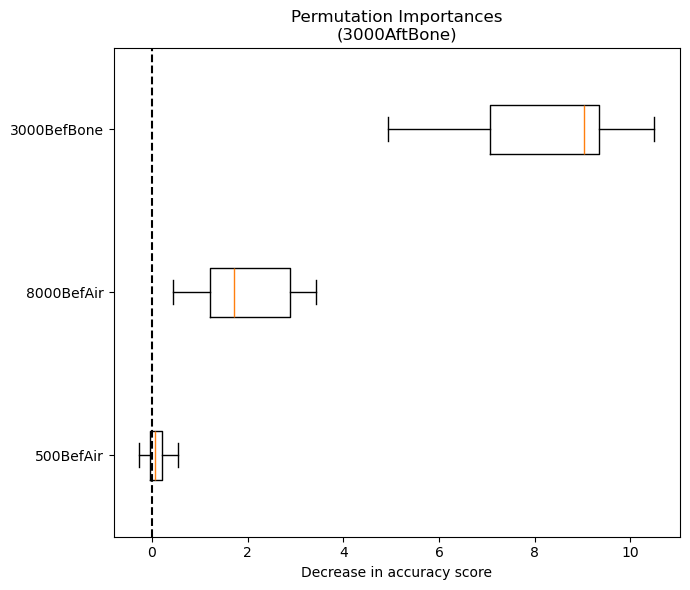

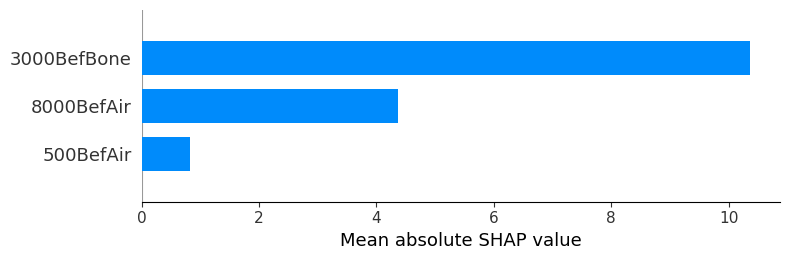

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


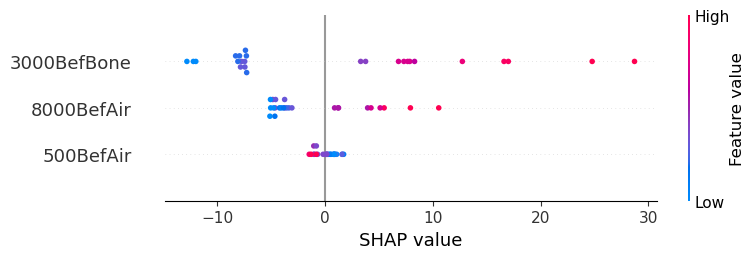

4000AftBone


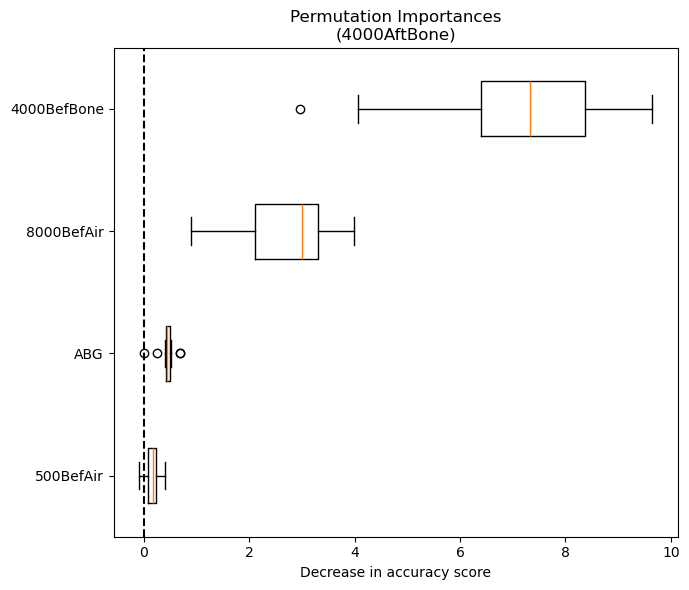

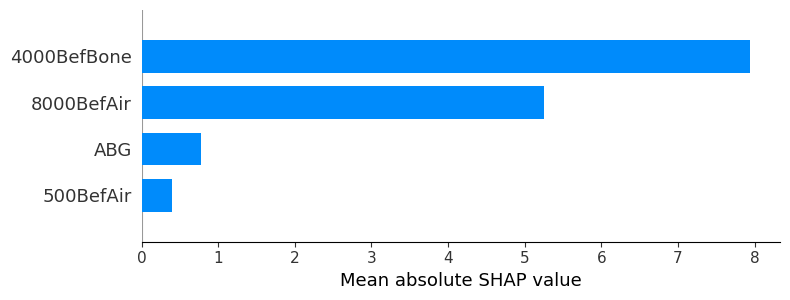

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


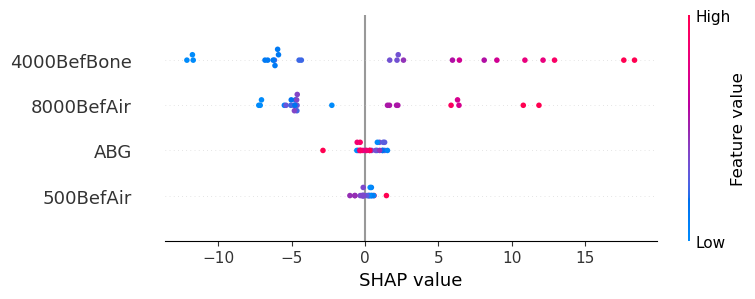

In [1]:
import funct
import importlib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import shap

importlib.reload(funct)

x_train = pd.read_csv('variables/x_train.csv')
y_train = pd.read_csv('variables/y_train.csv')
x_test = pd.read_csv('variables/x_test.csv')
y_test = pd.read_csv('variables/y_test.csv')

    
lasso_distance_filters = funct.load_pickle("variables/class_columns") 

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, scoring="neg_mean_absolute_error", n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax



for i in range(16):
    x_cols = lasso_distance_filters[i]
    x_train_sel = x_train[x_cols]
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    x_test_sel = x_test[x_cols]

    print(y_train_i.name)
    param_grid = {
        'max_depth': [5, 10, 20, 80, 90, 100],
        'max_features': [1,2, 3],
        'n_estimators': [50, 80, 100]
    }
    # Create a based model
    rf = RandomForestRegressor(random_state=33)
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
    grid_search.fit(x_train_sel, y_train_i)
    rf_model = RandomForestRegressor(random_state=33)
    rf_model.set_params(**grid_search.best_params_)
    rf_model.fit(x_train_sel, y_train_i)

    fig, ax = plt.subplots(figsize=(7, 6))
    
    plot_permutation_importance(rf_model, x_test_sel, y_test_i, ax)

    ax.set_title("Permutation Importances\n("+ y_train_i.name +")")
    ax.set_xlabel("Decrease in MAE score")
    ax.figure.tight_layout()
    plt.show()

    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(x_test_sel)
    bar_plot = shap.summary_plot(shap_values, x_test_sel, plot_type="bar",show=False)
    plt.xlabel("Mean absolute SHAP value")
    plt.show()
    beeswarm = shap.summary_plot(shap_values, x_test_sel,show=False)
    plt.xlabel("SHAP value")
    plt.show()
    

In [2]:
import funct
import importlib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

importlib.reload(funct)

lasso_distance_filters = funct.load_pickle("variables/class_columns") 

feature_counts={}

for features in lasso_distance_filters:
    for feature in features:
        if feature in feature_counts:
            feature_counts[feature] += 1
        else:
            feature_counts[feature] = 1 

feature_counts = dict(sorted(feature_counts.items(), key=lambda item: item[1]))
        
for feature in feature_counts:
    print(feature)
    print(feature_counts[feature])

1500_2000BA
1
Bone/Air
1
1000BefAir
1
1500BefAir
1
500BefBone
1
2000BefAir
2
3000BefAir
2
3000BefBone
2
6000_8000BA
2
Gender-0=M, 1 =F
2
4000BefAir
2
Age
3
500_1000BB
3
2000BefBone
3
Bone*Air
3
1500BefBone
3
Side 0=L, 1=R
3
125BefAir
4
6000BefAir
4
250BefAir
4
3000_4000BB
4
1000BefBone
5
4000BefBone
5
500BefAir
7
ABG
7
8000BefAir
10
